# Data Story Telling

## Dataset: Contagiados COVID 19 - Temática: Salud 

### Introducción

#### Objetivo
Con los datos históricos que se posee acerca de los contagiados en la República Argentina, ¿hay indicios que demuestren que hay alguna correlación entre alguna de las variables y el fallecimiento de un contagiado?

#### Contexto del negocio
El año 2019 comenzaron los contagios de COVID-19, al momento que la misma se convirtió en un pandemia paso a ser un tema de suma importancia para los paises, apartir de ese instante se comenzó a llevar registro de los contagios, en el caso particular de la Argentina, toda esa información fue administrada por el gobierno nacional atraves de un sistema de carga de esa data. Dichos datos fueron disponibilizados para que el público en general pueda acceder y descargar los mismos.

#### Problema del negocio
A la información recavada por parte del gobierno nacional se la pretende poder utilizar para poder llevar a cabo la toma de decisiones estratégicas.

#### Contexto analítico
El dataset que es utilizado en el notebook tiene como temática la salud, el mismo fué descargado de https://www.datos.gob.ar que es el sitio oficial del gobierno de la República Argentina. Dentro del sitio luego de un análisis se decidio descargar la información de los contagiados de la Republica Argentina. Es un único archivo en formato CSV.

### Abstract:
El dataset almacena el listado de los contagiados de COVID-19 en la República Argentina desde el 01/03/2020 hasta el 04/06/2022, dicho dataset tiene una cantidad de 105.916.221 registros de los cuales seleccione los primeros 100.000 registros por lo tanto hay variables como las fechas que solo muestran un periodo muy corto.

El dataset lleva el registro de los contagios de COVID-19 que se produjeron en Argentina, dentro de información de maneja se puede mencionar que posee 17 campos entre los que se destacan los siguientes:

- id_evento_caso = es el número de caso, debido a que solo trabajamos con una parte de datasets, no será información muy útil.
- sexo
- edad
- residencia_provincia_nombre = es la provincia de residencia de la persona, aquí hay que aclarar que Buenos Aires y CABA pertenecen a la misma provincia que es Buenos Aires, pero hacen la diferencia entre interior(Buenos Aires) y capital(CABA).
- origen_financiamiento = indica si el análisis clínico fue realizado en la parte pública o privada.
- residencia_departemento_nombre = me indica el departamento de residencia de la persona cargado; este es un campo que no se tiene mucho en cuenta por que tiene mucha información sucia, como datos sin especificar, valores ficticios, etc.
- Hay casos de datos de tipos fecha que tienen muchos registros no cargados, como fecha_inicio_sintomas o fecha de fallecimiento, en este último caso evidencian que son para las personas que no han fallecido por causas del COVID-19.



#### Librerías necesarias de tener instaladas en el entorno virtual para el correcto funcionmaiento del notebook.

In [ ]:
# Librería que me permite tener una idea de los porcentajes de los campos que poseen nulos
!pip install missingno

# librería que permite graficar la matríz de confusión
!pip install scikit-plot

In [ ]:
# Librerías gráficas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Librería para visualización de nulos
import missingno as msno

# Libreria gráfica para la matríz de confusión
import scikitplot as skplt

# Librerías standard
import pandas as pd
import numpy as np

# Librerías para encoding de variables
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Librerías para hacer balanceo del dataset
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Librerías para algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Librerías para métricas
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

### EDA (parte 1)
En una primera instancia se va llevar a cabo un análisis inicial del dataset para tener una panorama general de la data que maneja.

Se obtiene el dataset desde un archivo almacenado en Google Drive.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1Y1XbymFFNfLCdTjDT64oIMVw1YE4x5TdlzK2eyCWoDM/export?format=csv&gid=1022416023'

df = pd.read_csv(url)

df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2022-06-05
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2022-06-05
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2022-06-05
3,10000002,F,45.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2022-06-05
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2022-06-05


In [ ]:
df.shape

(100000, 25)

In [ ]:
df.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              99970 non-null   float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_inicio_sintomas             36418 non-null   object 
 9   fecha_apertura                    100000 non-null  object 
 10  sepi_apertura                     100000 non-null  int64  
 11  fecha_internacion                 2658 non-null    ob

In [ ]:
df.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,1.000000e+05,99970.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.375346e+06,38.579594,14.669870,22.348080,23.366560,204.02063
std,2.373808e+06,17.447920,2.362236,28.592709,28.796844,253.71888
min,1.000000e+06,1.000000,14.000000,2.000000,2.000000,0.00000
25%,1.001848e+07,26.000000,14.000000,2.000000,6.000000,14.00000
50%,1.004438e+07,37.000000,14.000000,6.000000,6.000000,84.00000
75%,1.007070e+07,50.000000,14.000000,30.000000,34.000000,410.00000
max,1.009716e+07,222.000000,23.000000,94.000000,99.000000,882.00000


Con la información obtenida tenemos una idea de cuales con los campos que maneja, de que tipo son, si existen nulos y los estadísticos de los campos numéricos.

### Data Wrangling

Terminado el EDA en donde se obtuvo una idea general de la información del dataset, se procede con el análisis de duplicacado, nulos y atípicos. Una vez terminado el análisis de cada uno de estos pasos, se procederá a la toma de decisiones para cada uno de los casos.

#### Análisis de duplicados

Se verifica si existen duplicados.

In [ ]:
df.duplicated().unique()

array([False])

#### Decisión para duplicados:
Se observa que no existen duplicados por lo tanto no se lleva a cabo ninguna acción.

#### Análisis de nulos

Para la verificación de aquellos campos que presentan nulos se lleva a cabo el cálculo de los porcentajes de los mismos con respecto al total. 

In [ ]:
por_nulos = (df.isnull().sum()/df.shape[0])*100

por_nulos = por_nulos.sort_values(ascending=False)

por_nulos = por_nulos[por_nulos>0]

por_nulos

fecha_cui_intensivo      99.486
fecha_fallecimiento      99.370
fecha_internacion        97.342
fecha_inicio_sintomas    63.582
fecha_diagnostico         6.311
edad                      0.030
dtype: float64

Para tener una idea más clara de los valores, es que se representa estos porcentajes por medio de un gráfico de barras.

<AxesSubplot:>

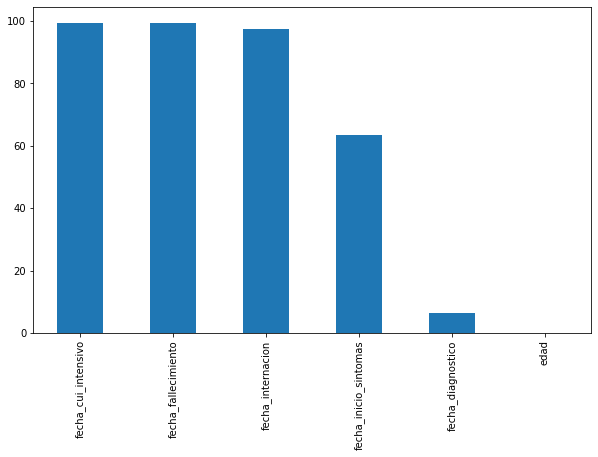

In [ ]:
plt.figure(figsize=(10, 6))

por_nulos.plot(kind='bar')

Gráfica los nulos del dataset.

<AxesSubplot:>

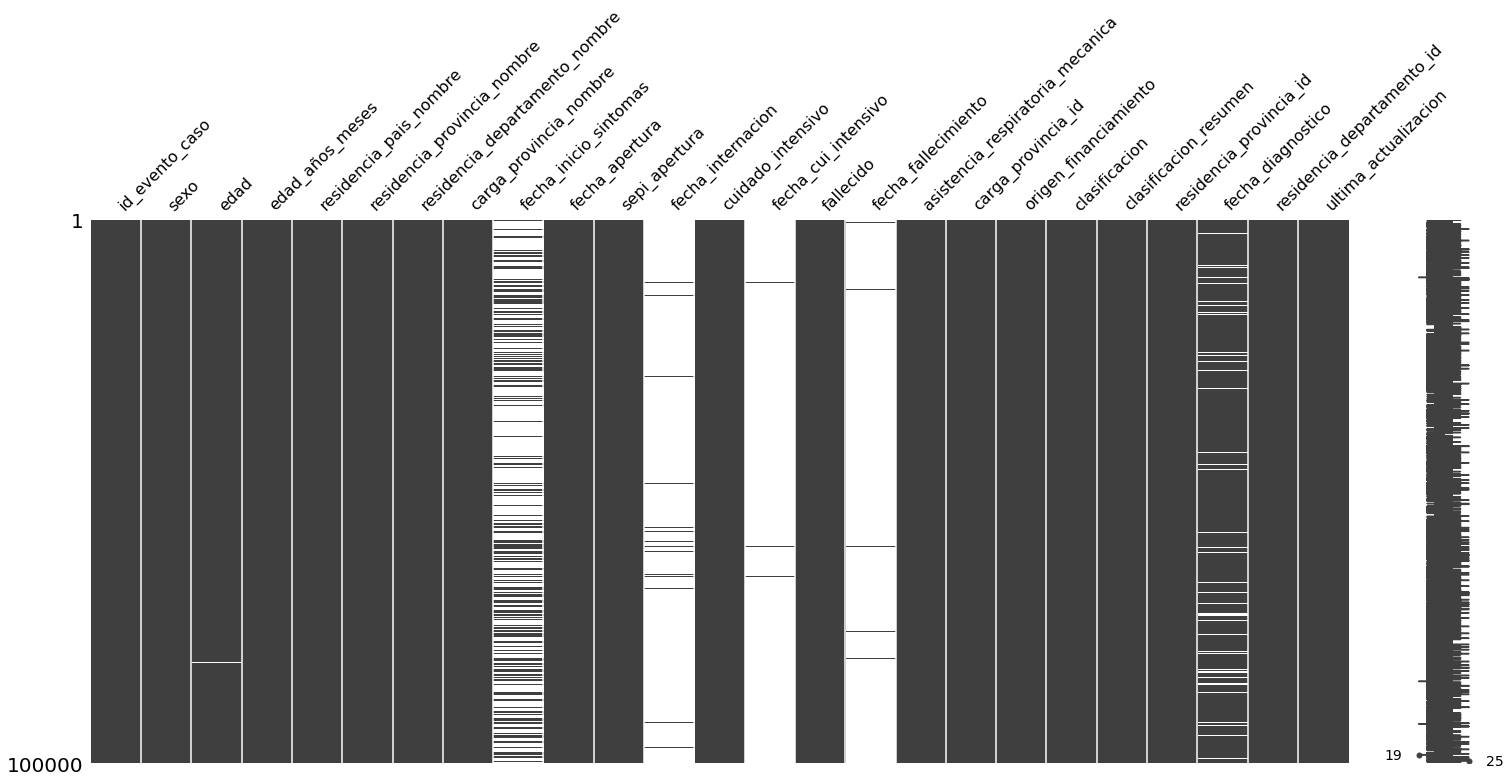

In [ ]:
msno.matrix(df)

Mapa de calor de correlación de variables.

<AxesSubplot:>

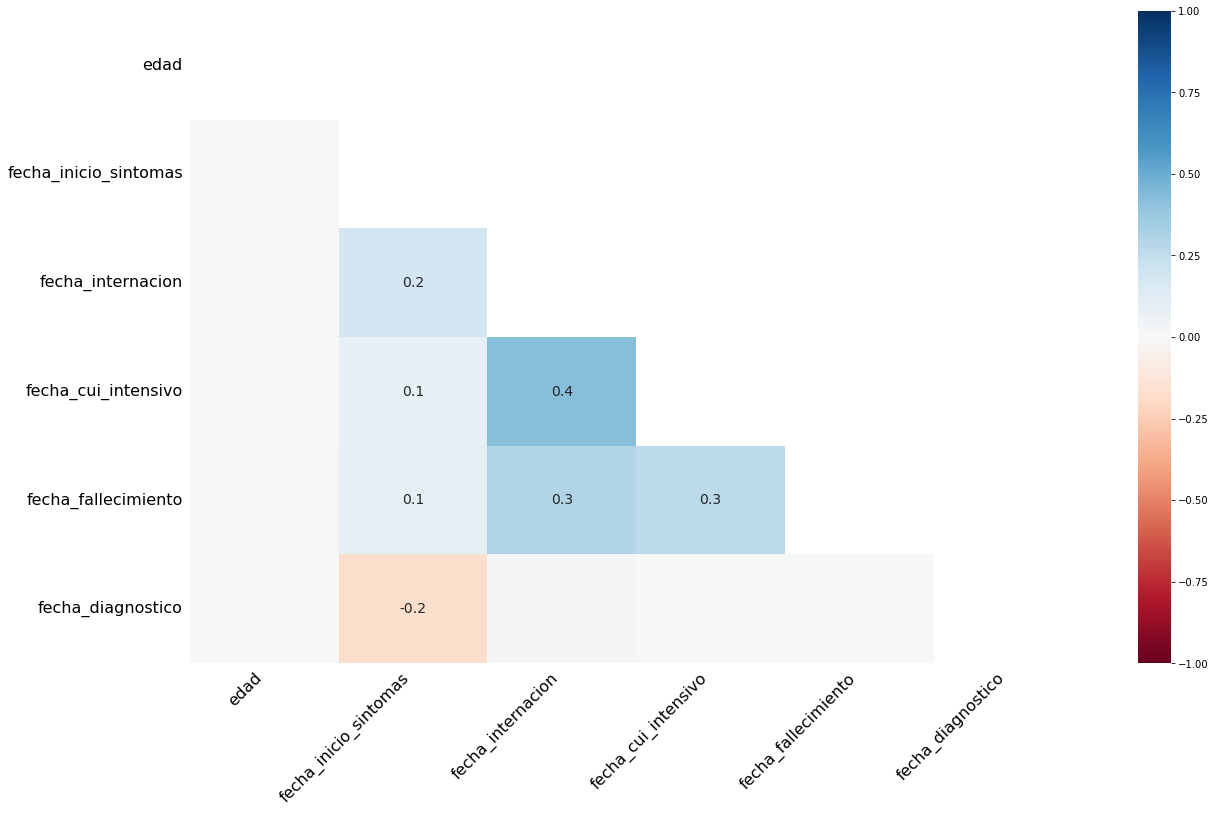

In [ ]:
msno.heatmap(df)

#### Decisión para nulos: 
* Las variables que poseen más del 60% de nulos se las elimina. 
* Para el caso de **fecha_diagnostico**, no posee muchos nulos pero no es de importancia en el caso se la elimina.
* Para la variable **edad** que posee pocos nulos se va a emplear alguna técnica de reemplazo. 

Columnas a borrar con muchos nulos.

In [ ]:
col_del = ['fecha_cui_intensivo', 'fecha_fallecimiento', 'fecha_internacion', 'fecha_inicio_sintomas', 'fecha_diagnostico'] 

df = df.drop(labels=col_del, axis=1) # Borrando las columnas en col_del

df.columns 

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_apertura', 'sepi_apertura', 'cuidado_intensivo', 'fallecido',
       'asistencia_respiratoria_mecanica', 'carga_provincia_id',
       'origen_financiamiento', 'clasificacion', 'clasificacion_resumen',
       'residencia_provincia_id', 'residencia_departamento_id',
       'ultima_actualizacion'],
      dtype='object')

In [ ]:
df.edad.value_counts()

31.0     2523
30.0     2516
29.0     2484
28.0     2411
27.0     2393
         ... 
122.0       2
104.0       2
100.0       2
111.0       1
102.0       1
Name: edad, Length: 107, dtype: int64

Columna **edad** con pocos nulos, se reemplaza por la mediana(ya que se observaron algunos outliers).

In [ ]:
df['edad'] = df['edad'].fillna(df['edad'].median())

Se verifica que el dataset no contenga nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              100000 non-null  float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_apertura                    100000 non-null  object 
 9   sepi_apertura                     100000 non-null  int64  
 10  cuidado_intensivo                 100000 non-null  object 
 11  fallecido                         100000 non-null  ob

#### Análisis de Outliers

Filtro solo las columnas que se numéricas.

In [ ]:
numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

col_num = df.select_dtypes(include=numericos)

col_num.columns

Index(['id_evento_caso', 'edad', 'sepi_apertura', 'carga_provincia_id',
       'residencia_provincia_id', 'residencia_departamento_id'],
      dtype='object')

Elimino la columna **id_evento_caso** ya que no es de utilidad en el análisis que se está llevando acabo, además para que no ensucie los gráficos a que a continuación se muestran.

In [ ]:
col_num = col_num.drop('id_evento_caso', axis=1)

Gráfica de las variables numéricas con atípicos. 

<AxesSubplot:>

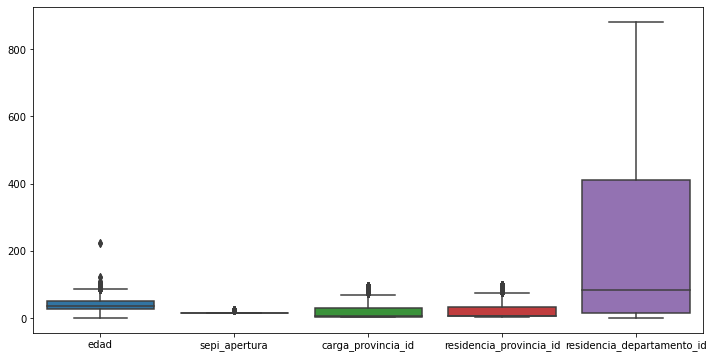

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=col_num)

Gráfica de las variables numéricas sín atípicos. 

<AxesSubplot:>

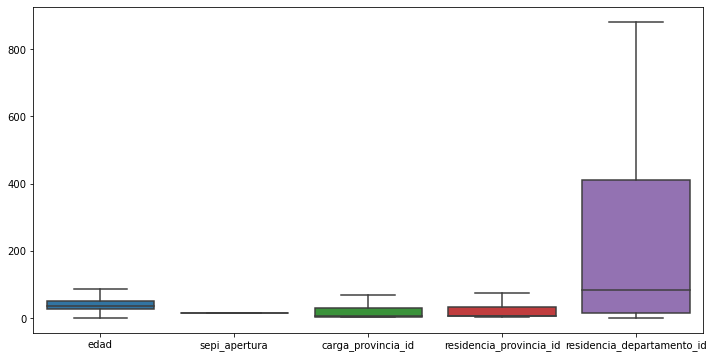

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=col_num, showfliers=False)

#### Decisión para outliers:
Se va a lleavar a cabo la imputación de variables según el siguiente criterio:

* Si el valor de la variable es mayor al q3 o menor al q1, el mismo es reemplazado por la mediana.
* Si el valor de la variable esta dentro del rango intercuartílico(q3-q1) se conserva el mismo.

Se crea una función que permite aplicar el criterio de reemplazo mensionado anteriormente. Se le debe pasar un dataframe con las columnas a imputar.

In [ ]:
def imputar_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper, 
                 df.median(), 
                 np.where(df < lower, 
                          df.median(), 
                          df) 
                 )
    return df

Imputo las columnas.

In [ ]:
columnas = col_num.columns

df[columnas] = imputar_outliers_IQR(df[columnas])

In [ ]:
df

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,14.0,NO,NO,NO,6.0,Privado,Caso Descartado,Descartado,2.0,0.0,2022-06-05
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2021-04-08,14.0,NO,NO,NO,2.0,Público,Caso Descartado,Descartado,2.0,0.0,2022-06-05
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-08,14.0,NO,NO,NO,6.0,Público,Caso Descartado,Descartado,6.0,490.0,2022-06-05
3,10000002,F,45.0,Años,Argentina,Buenos Aires,La Matanza,CABA,2021-04-08,14.0,NO,NO,NO,2.0,Público,Caso Descartado,Descartado,6.0,427.0,2022-06-05
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,2021-04-08,14.0,NO,NO,NO,2.0,Público,Caso Descartado,Descartado,2.0,1.0,2022-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10097151,F,14.0,Años,Argentina,Chaco,Almirante Brown,Chaco,2021-04-09,14.0,NO,NO,NO,22.0,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,22.0,7.0,2022-06-05
99996,10097152,F,38.0,Años,Argentina,Mendoza,San Rafael,Mendoza,2021-04-09,14.0,NO,NO,NO,50.0,Privado,Caso Descartado,Descartado,50.0,105.0,2022-06-05
99997,10097153,M,30.0,Años,Argentina,Buenos Aires,Quilmes,Buenos Aires,2021-04-09,14.0,NO,NO,NO,6.0,Público,Caso Descartado,Descartado,6.0,658.0,2022-06-05
99998,10097154,M,31.0,Años,Argentina,Buenos Aires,Lanús,Buenos Aires,2021-04-09,14.0,NO,NO,NO,6.0,Privado,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6.0,434.0,2022-06-05


#### Resultado Data Wrangling
Con la aplicación de las distintas técnicas, se logró tener un dataset limpio de duplicados, nulos y atípicos. 
A continuación se procede a realizar otro EDA que me permita responder preguntas de interés.

### EDA (parte 2)

##### Pregunta / Hipótesis 1
* Hay más mujeres que hombres que se contagiaron de covid en el periodo seleccionado.

###### Proporción de contagios por sexo

In [ ]:
discriminado_por_sexo = df.groupby("sexo").count()

discriminado_por_sexo

,id_evento_caso,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,residencia_departamento_id,ultima_actualizacion
sexo,,,,,,,,,,,,,,,,,,,
F,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663,52663
M,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595,46595
NR,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742


Text(0.5, 1.0, 'Contagiados por sexo')

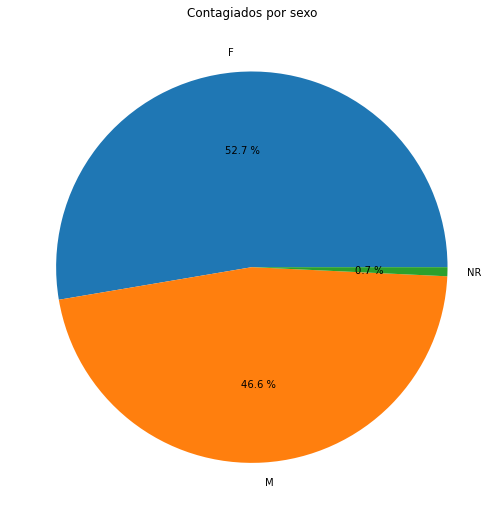

In [ ]:
discriminado_por_sexo_id = discriminado_por_sexo.id_evento_caso

fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(discriminado_por_sexo_id.values, labels=discriminado_por_sexo_id.index, 
       autopct=ut.formatear_autopct(discriminado_por_sexo_id.values), explode=[0.05]*3, pctdistance=0.5)

plt.title('Contagiados por sexo')

##### Pregunta / Hipótesis 2
* Se desea saber cómo es la proporción de contagios con respecto a las provincias.

###### Proporción de contagios por provincia de residencia




In [ ]:
total_por_provincia_todos = df.groupby("residencia_provincia_nombre").count()

total_por_provincia = total_por_provincia_todos.id_evento_caso

Text(0.5, 1.0, 'Cantidad de contagios por provincias')

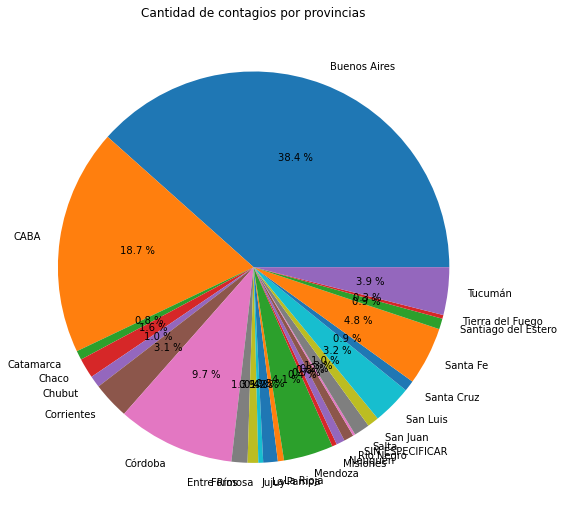

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(total_por_provincia.values, labels=total_por_provincia.index, autopct="%0.1f %%")

plt.title('Cantidad de contagios por provincias')

###### Proporción de contagios por provincia de residencia(sólo las 15 provincias con mas contagios)

In [ ]:
total_por_provincia_15 = total_por_provincia_todos.sort_values('id_evento_caso', ascending=False)[:15]

<AxesSubplot:xlabel='residencia_provincia_nombre', ylabel='id_evento_caso'>

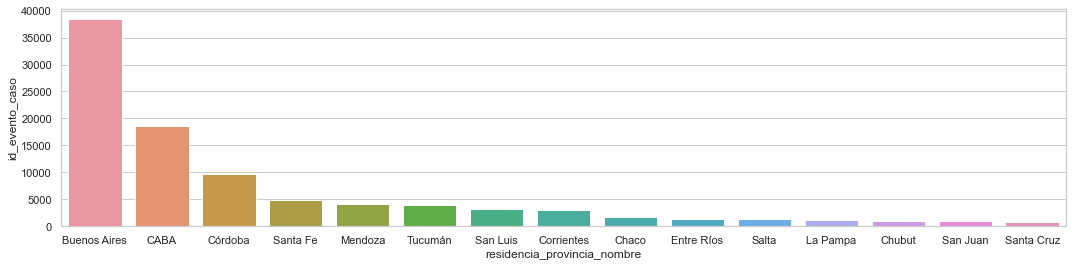

In [ ]:
sns.set_theme(style="whitegrid")

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

sns.barplot(x=total_por_provincia_15.index, y=total_por_provincia_15.id_evento_caso, data=total_por_provincia_15)

####  Resultado EDA (parte 2)

Las recomendaciones a las que se llegan son la siguientes:

- Con respecto a la consulta planteada de saber si hay mayor cantidad de contagios según el sexo, del análisis se desprende los siguiente:
Existe una parte de los registros que no posee datos(NR) que es muy ínfima y su suma para algunas de las otras partes no afecta el análisis por lo tanto no la tenemos en cuenta. Si bien se evidencia un mayor porcentaje de varones contagiados ésta diferencia no es tan grande.

- De las dos últimas gráficas se observa el mismo fenómeno pero desde distintas perspectivas que Buenos Aires(suma de Buenos Aires y CABA) es por lejos que más registros tiene, esto es algo razonable ya que son las zonas más densamente pobladas de las nación. Para tener una mejor visión de los datos, en el gráfico de barras solo se eligen solo 15 provincias, ya que en el piechart al graficarlas a todas quedaba confusa la gráfica 

### Encoding de variables categóricas

Se instnacia la clase usada para el encoding.

In [ ]:
encoder = LabelEncoder()

Se verifica con que campos se cuenta.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              100000 non-null  float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_apertura                    100000 non-null  object 
 9   sepi_apertura                     100000 non-null  float64
 10  cuidado_intensivo                 100000 non-null  object 
 11  fallecido                         100000 non-null  ob

Se crea copia del dataframe original y se utiliza la copia para trabajar.

In [ ]:
df1 = df.copy()

* Se codifican de variables con muchas categorías por medio de Label Encoder.
* Se codifican cada uno de los siguientes campos: residencia_pais_nombre, residencia_provincia_nombre, residencia_departamento_nombre, carga_provincia_nombre, clasificacion, clasificacion_resumen.

In [ ]:
df1['residencia_pais_nombre'] = encoder.fit_transform(df1['residencia_pais_nombre']).astype('int32')
df1['residencia_provincia_nombre'] = encoder.fit_transform(df1['residencia_provincia_nombre']).astype('int32')
df1['residencia_departamento_nombre'] = encoder.fit_transform(df1['residencia_departamento_nombre']).astype('int32')
df1['carga_provincia_nombre'] = encoder.fit_transform(df1['carga_provincia_nombre']).astype('int32')
df1['clasificacion'] = encoder.fit_transform(df1['clasificacion']).astype('int32')
df1['clasificacion_resumen'] = encoder.fit_transform(df1['clasificacion_resumen']).astype('int32')
df1['sexo'] = encoder.fit_transform(df1['sexo']).astype('int32')
df1['fallecido'] = encoder.fit_transform(df1['fallecido']).astype('int32')

* Se codifican las variables con pocas categorías por medio de One Hot Encoder
* Se codifican cada uno de los siguientes campos: sepi_apertura, fallecido, asistencia_respiratoria_mecanica, origen_financiamiento, cuidado_intensivo, edad_años_meses

In [ ]:
df1 = pd.get_dummies(df1, columns=['sepi_apertura', 'asistencia_respiratoria_mecanica', 'origen_financiamiento', 'cuidado_intensivo', 'edad_años_meses'])

* Se eliminan las columnas contrastantes.
* Se eliminan las columnas con referencias a fechas que no son de utilidad en el análisis.
* Se elimina la columna **id_evento_caso** ya que solo es un identificador del registro y no es útil en el análisis.


In [ ]:
df1.drop(columns=['sepi_apertura_14.0', 'asistencia_respiratoria_mecanica_NO', 'origen_financiamiento_Privado', 'cuidado_intensivo_NO', 'edad_años_meses_Años'], inplace=True)  

df1.drop(columns=['fecha_apertura', 'ultima_actualizacion'], inplace=True)  

df1.drop(columns=['id_evento_caso'], inplace=True)  

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   sexo                                 100000 non-null  int32  
 1   edad                                 100000 non-null  float64
 2   residencia_pais_nombre               100000 non-null  int32  
 3   residencia_provincia_nombre          100000 non-null  int32  
 4   residencia_departamento_nombre       100000 non-null  int32  
 5   carga_provincia_nombre               100000 non-null  int32  
 6   fallecido                            100000 non-null  int32  
 7   carga_provincia_id                   100000 non-null  float64
 8   clasificacion                        100000 non-null  int32  
 9   clasificacion_resumen                100000 non-null  int32  
 10  residencia_provincia_id              100000 non-null  float64
 11  residencia_dep

#### Resultado de encoding de variables categóricas:
Actualmente se posee un dataset con todas variables numéricas, listo para ser utilizado en algún algoritmo pero antes hay que ver si el dataset no esta desbalanceado.

### Balanceo de las variables de salida(Oversampling)

Como el dataset esta desbalanceado, se realiza el oversampling del dataset para balancear los datos.

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

X = df1.drop(['fallecido'], axis=1) 
y = df1['fallecido'] 

X_over, y_over = oversample.fit_resample(X, y) 

#### Se determina los sets de entrenamiento y de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42) 

print(y_train.value_counts())
print(y_test.value_counts())

0    79603
1    79389
Name: fallecido, dtype: int64
1    19981
0    19767
Name: fallecido, dtype: int64


#### Resultado del balanceo de las variables de salida:
Como se observa ahora los datasets estan balanceados, a contunuación hay que seleccionar la mejor combinación de variables para ser utilizadas en el algoritmo a elegir.

### Selección de las variables a utilizar

Como primera medida se va a declarar una función que me devuelve cuales son las mejores variables a ser utlizadas en el algoritmo que se seleccionará posteriormente.

#### Declaración del método de Feature Selection(Forward Selection) y ejecución del mismo


In [ ]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        
        if(min_p_value < significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
            
    return best_features

Se pasa como parámetro a la función: X, y; para la selección de las variables.

In [ ]:
forward_selection(X, y)

/var/folders/g9/27rgn2kn2fl4wwdptss5l0qr0000gn/T/ipykernel_4776/2471681000.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::orde

/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/var/folders/g9/27rgn2kn2fl4wwdptss5l0qr0000gn/T/ipykernel_4776/2471681000.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_fea

/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/wb/opt/anaconda3/lib/python3.9/site-packages/

['asistencia_respiratoria_mecanica_SI',
 'edad',
 'cuidado_intensivo_SI',
 'clasificacion_resumen',
 'residencia_departamento_id',
 'origen_financiamiento_Público',
 'sexo',
 'residencia_pais_nombre',
 'residencia_departamento_nombre']

#### Resultado de la selección de variables a utilizar:
Con el listado de las variables a utilizar, resta emplearlas en el algoritmo que se ve a usar.

### Selección de los algoritmos a aplicar
Como la variable target es categórica se debe seleccionar un algoritmo de clasificación

Para el presente trabajo se van a utilizar 3 algoritmos de clasificación: KNN, Random Forest y Decision Tree

**Primer algoritmo: KNN**

Se corre el algoritmo, se calcula el accurary y se grafica la matriz de confusión.

Accuracy: 0.9956224212538995


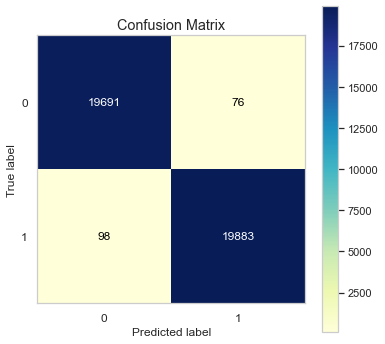

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)  
y_pred_knn = knn.predict(X_test) 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))

**Segundo algoritmo: Random Forest**

Se corre el algoritmo, se calcula el accurary y se grafica la matriz de confusión.

Accuracy: 0.9989685015598269


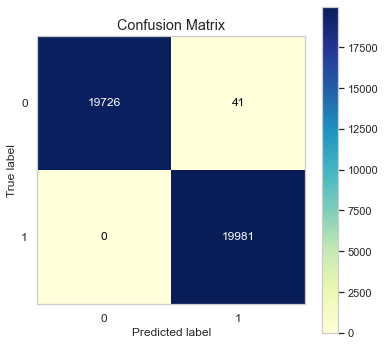

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train) 
y_pred_rf = rf.predict(X_test) 
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

**Tercer algoritmo: Decision Tree**

Se corre el algoritmo, se calcula el accurary y se grafica la matriz de confusión.

Accuracy: 0.9275435242024755


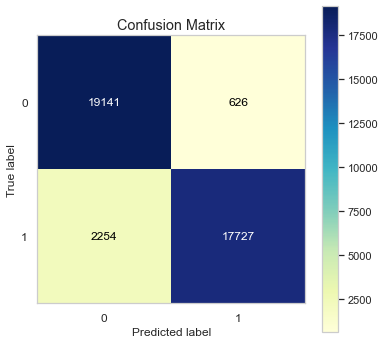

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test) 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))

#### Resultado de la selección de los algoritmos a aplicar:
Con los resultados de los accuracy y las matrices de confusión de cada algoritmo solo nos resta realizar los cálculos de las métricas para cada uno de ellos.

### Calculo de métricas para cada uno de los algoritmos

**Métricas para KNN**

In [ ]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19767
           1       1.00      1.00      1.00     19981

    accuracy                           1.00     39748
   macro avg       1.00      1.00      1.00     39748
weighted avg       1.00      1.00      1.00     39748



**Métricas para Random Forest**

In [ ]:
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19767
           1       1.00      1.00      1.00     19981

    accuracy                           1.00     39748
   macro avg       1.00      1.00      1.00     39748
weighted avg       1.00      1.00      1.00     39748



**Métricas para Decision Tree**

In [ ]:
print(classification_report(y_test, y_pred_dtc)) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19767
           1       0.97      0.89      0.92     19981

    accuracy                           0.93     39748
   macro avg       0.93      0.93      0.93     39748
weighted avg       0.93      0.93      0.93     39748



#### Resultado del cálculo de métricas para cada uno de los algoritmos

Como se puede observar de la métricas, los mejores resultados se los obtiene KNN y de Random Forest pero lo que llama la atención es que los mismos tiene un 100 % de probabilidad en todas las métricas, habria que revisar hasta que punto con menos variables siguen teniendo ese rendimiento, ya que podría darse un caso de overfitting. Para el caso de árboles de desición se observa que el mismo tiene un rendimiento más pobre.